# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from statistics import mean

## 'flight' data frame from file
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment   
0    792         172      0            No                    Yes  \
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price   
0           Yes      Sunday    Yes     Yes      338.820           1571.02  \
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


min price = 44.415
max price = 593.635
avg price =  376.585253082139
500 is at 1.82 standard deviations from the mean


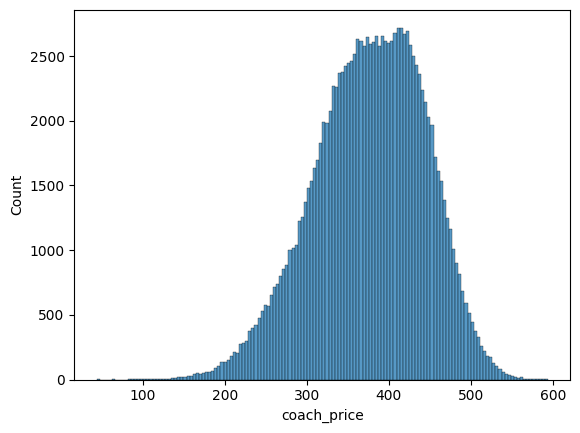

<Figure size 640x480 with 0 Axes>

In [3]:
## Question 1
print ('min price = ' + str(min(flight.coach_price)))
print ('max price = ' + str(max(flight.coach_price)))
print ('avg price =  ' + str(mean(flight.coach_price)))

standard_deviations = round((500 - mean(flight.coach_price)) / flight.coach_price.std(), 2)
print ('500 is at ' + str(standard_deviations) + ' standard deviations from the mean')

sns.histplot(flight.coach_price)
plt.show()
plt.clf()

$500 is a high price to pay.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

min price = 170.77
max price = 593.635
avg price = 431.834377372817
500 is at 1.06 standard deviations from the mean


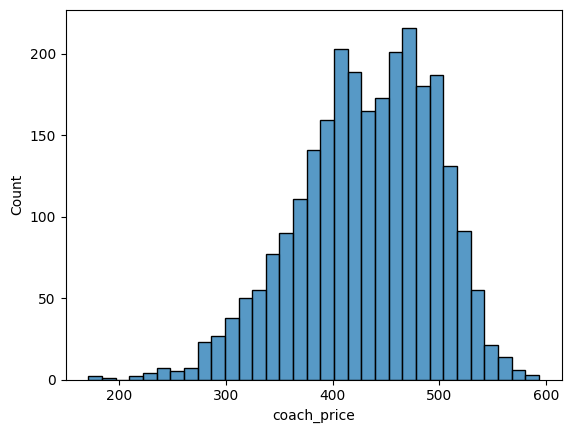

<Figure size 640x480 with 0 Axes>

In [4]:
## Task 2
print ('min price = ' + str(min(flight.coach_price[flight['hours'] == 8 ])))
print ('max price = ' + str(max(flight.coach_price[flight['hours'] == 8 ])))
print ('avg price = ' + str(mean(flight.coach_price[flight['hours'] == 8 ])))

standard_deviations = round((500 - mean(flight.coach_price[flight['hours'] == 8 ])) / flight.coach_price[flight['hours'] == 8 ].std(), 2)
print ('500 is at ' + str(standard_deviations) + ' standard deviations from the mean')

sns.histplot(flight.coach_price[flight['hours'] == 8])
plt.show()
plt.clf()

For flights that are 8 hours long, the price of 500 is more reasonable.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

116287    58
127071    54
118200    54
110741    54
117801    54
          ..
6674       0
6673       0
6672       0
6671       0
0          0
Name: delay, Length: 129680, dtype: int64
-----------------------------
129689    1560
129701    1536
129697    1536
129756    1533
129702    1532
          ... 
129713    1462
129764    1462
129741    1459
129684    1446
129734    1446
Name: delay, Length: 100, dtype: int64
-----------------------------
0.0007705347511172754


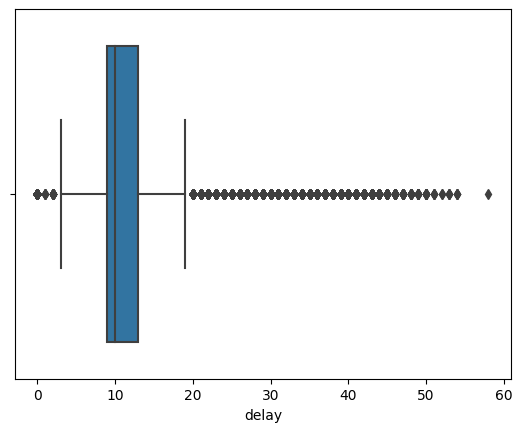

<Figure size 640x480 with 0 Axes>

In [6]:
## Task 3

print (flight.delay[flight['delay']<1000].sort_values(ascending=False))
print ('-----------------------------')
print (flight.delay[flight['delay']>1000].sort_values(ascending=False))
print ('-----------------------------')
#calculate percentage of delays longer than 60 min
print (flight.delay[flight['delay']>1000].count() / flight.delay.count())



sns.boxplot(x=flight.delay[flight['delay'] < 60])
plt.show()
plt.clf()


Most delays are around 10 minutes and no longer than 60 minutes. Flights with more than 60 minutes delay are re-scheduled for next day(0.08%). 

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

/var/folders/k6/lgcrwv6s5l390y54rmnbcqy00000gn/T/ipykernel_1715/2698302705.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='firstclass_price', y='coach_price', data=flight, palette='bright', alpha=0.4)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


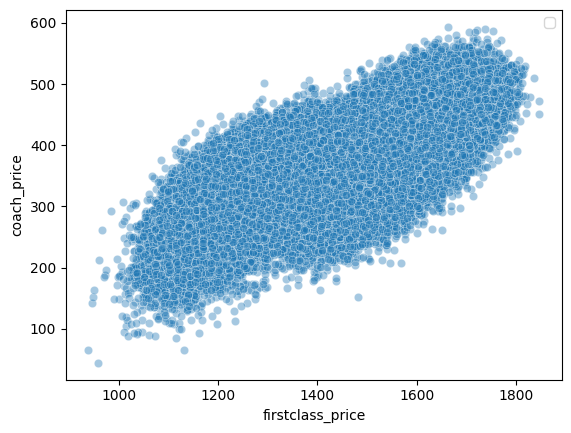

                  coach_price  firstclass_price
coach_price          1.000000          0.758757
firstclass_price     0.758757          1.000000


<Figure size 640x480 with 0 Axes>

In [17]:
## Task 4

sns.scatterplot(x='firstclass_price', y='coach_price', data=flight, palette='bright', alpha=0.4)
plt.legend()
plt.show()
plt.clf()


print(flight[['coach_price', 'firstclass_price' ]].corr())

Flights with higher coach prices will have higher first-class prices. There is a strong relationship between prices.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

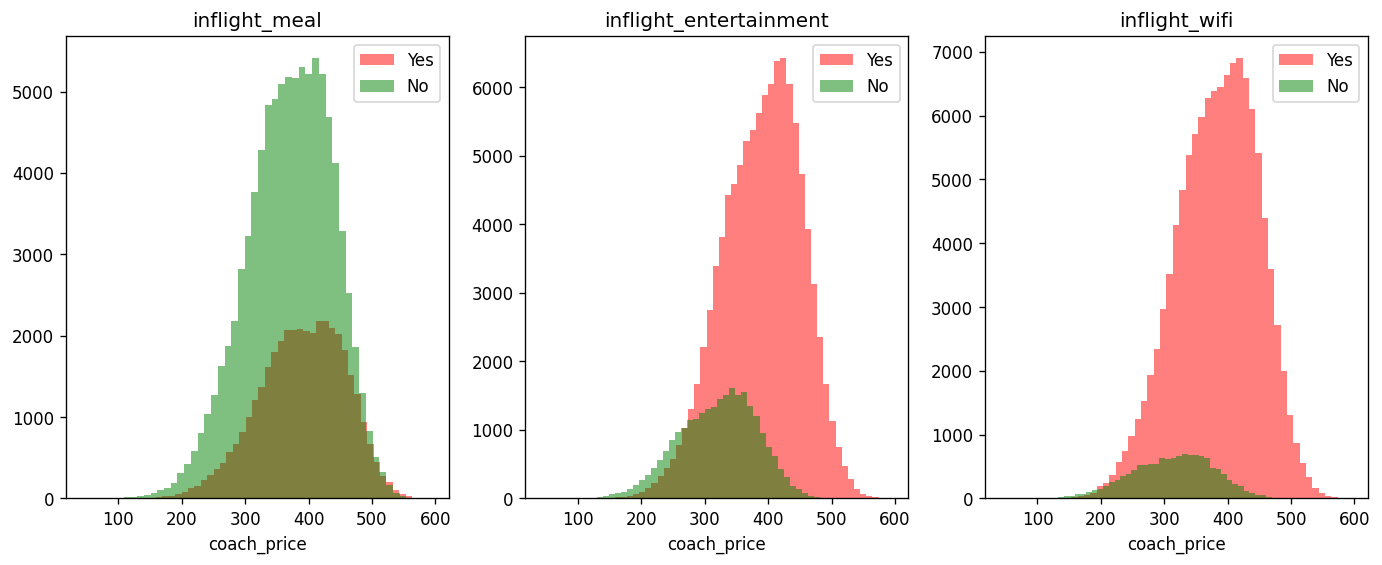

<Figure size 640x480 with 0 Axes>

In [20]:
## Task 5
plt.figure(figsize=(14,5), dpi=120)

plt.subplot(1,3,1)
plt.hist(flight.coach_price[flight['inflight_meal'] == 'Yes'], bins = 50, alpha=0.5, color = 'red', label='Yes')
plt.hist(flight.coach_price[flight['inflight_meal'] == 'No'], bins = 50, alpha=0.5, color = 'green', label='No')
plt.title('inflight_meal')
plt.legend(loc='upper right')
plt.xlabel('coach_price')

plt.subplot(1,3,2)
plt.hist(flight.coach_price[flight['inflight_entertainment'] == 'Yes'], bins = 50, alpha=0.5, color = 'red', label='Yes')
plt.hist(flight.coach_price[flight['inflight_entertainment'] == 'No'], bins = 50, alpha=0.5, color = 'green', label='No')
plt.title('inflight_entertainment')
plt.legend(loc='upper right')
plt.xlabel('coach_price')

plt.subplot(1,3,3)
plt.hist(flight.coach_price[flight['inflight_wifi'] == 'Yes'], bins = 50, alpha=0.5, color = 'red', label='Yes')
plt.hist(flight.coach_price[flight['inflight_wifi'] == 'No'], bins = 50, alpha=0.5, color = 'green', label='No')
plt.title('inflight_wifi')
plt.legend(loc='upper right')
plt.xlabel('coach_price')

plt.show()
plt.clf()

Entertainment and wi-fi are asociated with an increase in price.

6. How does the number of passengers change in relation to the length of flights?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


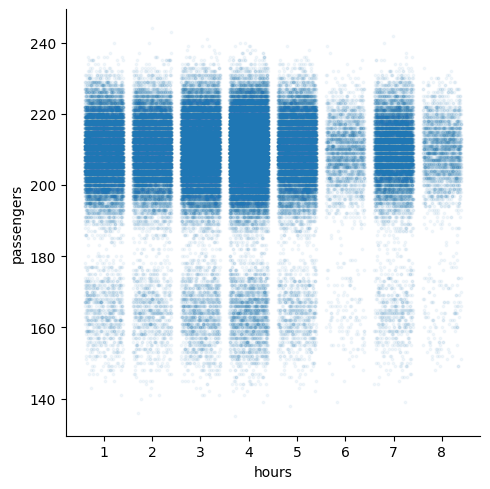

<Figure size 640x480 with 0 Axes>

In [37]:
## Task 6

sns.lmplot(data= flight, y= 'passengers', x= 'hours', x_jitter= 0.40, scatter_kws={"s": 3, "alpha":0.05}, fit_reg = False)
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

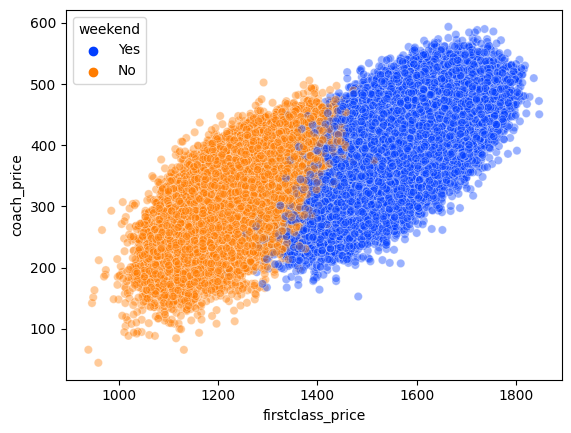

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 7

sns.scatterplot(x='firstclass_price', y='coach_price', data=flight, palette='bright', alpha=0.4, hue='weekend')
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

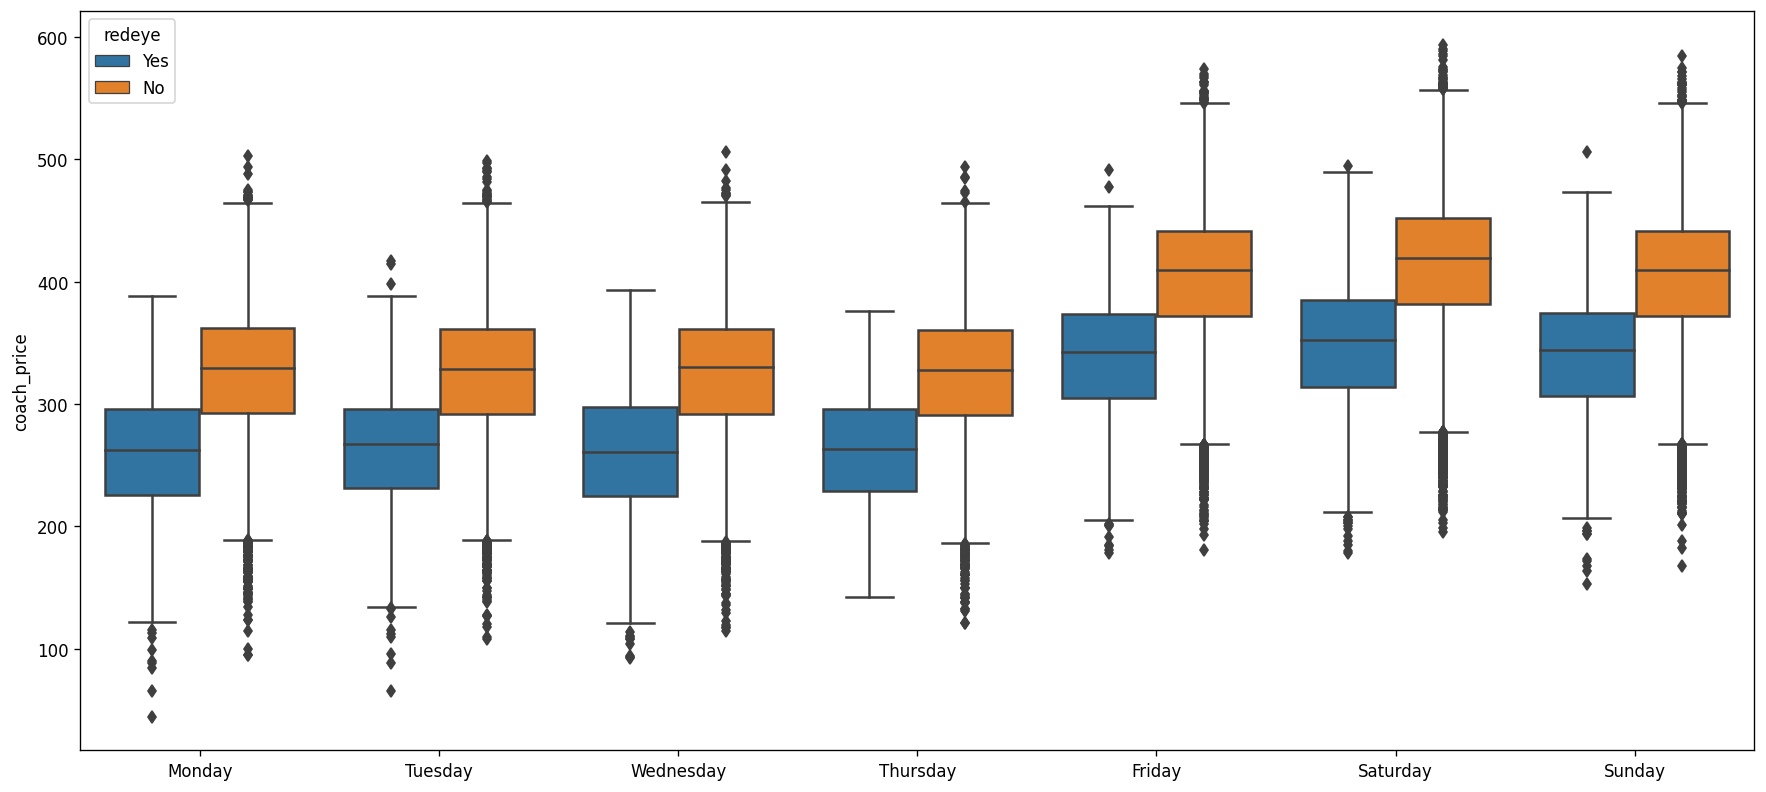

<Figure size 640x480 with 0 Axes>

In [47]:
## Task 8

plt.figure(figsize=(18,8), dpi=120)
sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('')
plt.show()
plt.clf()



Coach redeye (overnight) flights are cheaper then non redeye flights for each day of the week.